In [168]:
import datetime # для работы со времнем

import matplotlib.pyplot as plt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn

from sklearn import *
from lightgbm import LGBMRegressor

%matplotlib inline

In [169]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_submission = pd.read_csv('submission.csv')

In [170]:
df_train.head(10)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
5,12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
6,14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
7,11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
8,5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999
9,8649,23,1.0,46.461409,18.915552,8.0,13,17.0,2014,0.075779,B,B,6,1437,3,NaN,0,2,B,95380.220993


In [171]:
print(df_train.info())
print(df_train.shape)
df_train.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01


In [172]:
df_train[df_train['LifeSquare'].isnull()].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2113.0,8256.636062,4835.706043,28.000000,3917.000000,8308.000000,12357.000000,16777.000000
DistrictId,2113.0,26.999527,24.928012,0.000000,6.000000,23.000000,33.000000,190.000000
Rooms,2113.0,1.778987,0.764316,0.000000,1.000000,2.000000,2.000000,5.000000
Square,2113.0,60.352646,22.846588,17.414181,43.624731,58.634866,68.843287,604.705972
LifeSquare,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KitchenSquare,2113.0,1.383814,2.725244,0.000000,1.000000,1.000000,1.000000,62.000000
Floor,2113.0,9.913393,5.563304,1.000000,5.000000,9.000000,14.000000,27.000000
HouseFloor,2113.0,13.248935,8.091366,0.000000,4.000000,17.000000,17.000000,30.000000
HouseYear,2113.0,1981.707525,12.690541,1977.000000,1977.000000,1977.000000,1977.000000,2019.000000
Ecology_1,2113.0,0.105183,0.113981,0.000000,0.007122,0.072158,0.197368,0.437885


In [173]:
df_train['LifeSquare'] = df_train['LifeSquare'].fillna(df_train['LifeSquare'].median())

In [174]:
df_train[df_train['Healthcare_1'].isnull()].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,4798.0,8386.307211,4864.658955,2.000000,4144.250000,8420.500000,12589.500000,16797.000000
DistrictId,4798.0,41.983535,37.386871,1.000000,23.000000,27.000000,62.000000,208.000000
Rooms,4798.0,1.855356,0.859970,0.000000,1.000000,2.000000,2.000000,19.000000
Square,4798.0,56.989643,19.691782,1.136859,42.040604,53.492440,66.647835,212.932361
LifeSquare,4798.0,37.732678,108.818303,0.641822,29.098971,32.781260,41.116334,7480.592129
KitchenSquare,4798.0,5.856398,29.563604,0.000000,1.000000,6.000000,9.000000,2014.000000
Floor,4798.0,8.867653,5.358387,1.000000,5.000000,8.000000,12.000000,37.000000
HouseFloor,4798.0,12.830763,6.977174,0.000000,9.000000,14.000000,17.000000,99.000000
HouseYear,4798.0,1987.670488,17.684670,1910.000000,1977.000000,1977.000000,2005.000000,2020.000000
Ecology_1,4798.0,0.090077,0.100627,0.000000,0.011654,0.072158,0.101872,0.521867


In [175]:
df_train['Healthcare_1'] = df_train['Healthcare_1'].fillna(df_train['Healthcare_1'].median())

In [176]:
print(df_test.info())
print(df_test.shape)
df_test.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

,count,mean,std,min,25%,50%,75%,max
Id,5000.0,8412.595400,4832.674037,1.000000,4221.750000,8320.500000,12598.250000,16795.000000
DistrictId,5000.0,51.279200,44.179466,0.000000,21.000000,37.000000,77.000000,212.000000
Rooms,5000.0,1.910000,0.838594,0.000000,1.000000,2.000000,2.000000,17.000000
Square,5000.0,56.449500,19.092787,1.378543,41.906231,52.921340,66.285129,223.453689
LifeSquare,3959.0,36.158810,17.825287,0.333490,23.092026,32.925087,45.174091,303.071094
KitchenSquare,5000.0,5.976800,9.950018,0.000000,1.000000,6.000000,9.000000,620.000000
Floor,5000.0,8.632000,5.483228,1.000000,4.000000,7.000000,12.000000,78.000000
HouseFloor,5000.0,12.601000,6.789213,0.000000,9.000000,12.000000,17.000000,99.000000
HouseYear,5000.0,1984.392600,18.573149,1908.000000,1973.000000,1977.000000,2000.000000,2020.000000
Ecology_1,5000.0,0.119874,0.120070,0.000000,0.019509,0.072158,0.195781,0.521867


In [177]:
df_test[df_test['LifeSquare'].isnull()].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1041.0,8679.432277,4749.849878,30.000000,4780.000000,8744.000000,12713.000000,16786.000000
DistrictId,1041.0,27.707973,26.446994,1.000000,6.000000,23.000000,33.000000,169.000000
Rooms,1041.0,1.801153,0.753095,1.000000,1.000000,2.000000,2.000000,6.000000
Square,1041.0,60.448508,19.006856,26.719723,44.431455,60.072328,69.877653,163.325901
LifeSquare,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KitchenSquare,1041.0,1.480307,3.107350,0.000000,1.000000,1.000000,1.000000,61.000000
Floor,1041.0,10.319885,6.014444,1.000000,5.000000,9.000000,15.000000,28.000000
HouseFloor,1041.0,13.254563,8.308102,0.000000,3.000000,17.000000,17.000000,31.000000
HouseYear,1041.0,1982.261287,13.310238,1977.000000,1977.000000,1977.000000,1977.000000,2020.000000
Ecology_1,1041.0,0.101632,0.111492,0.000000,0.007122,0.072158,0.195781,0.437885


In [178]:
df_test['LifeSquare'] = df_test['LifeSquare'].fillna(df_train['Healthcare_1'].median())

In [179]:
df_test[df_test['Healthcare_1'].isnull()].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2377.0,8375.120320,4821.770095,1.000000,4224.000000,8265.000000,12516.000000,16789.000000
DistrictId,2377.0,43.686580,38.337733,1.000000,23.000000,27.000000,62.000000,210.000000
Rooms,2377.0,1.894405,0.822786,0.000000,1.000000,2.000000,2.000000,6.000000
Square,2377.0,57.915904,19.940871,1.975769,42.540968,54.491072,66.935126,223.453689
LifeSquare,2377.0,279.344708,387.665560,0.333490,29.403381,44.116118,900.000000,900.000000
KitchenSquare,2377.0,5.534287,5.468438,0.000000,1.000000,6.000000,9.000000,112.000000
Floor,2377.0,8.977282,5.439937,1.000000,5.000000,8.000000,12.000000,27.000000
HouseFloor,2377.0,13.006731,7.078917,0.000000,9.000000,14.000000,17.000000,99.000000
HouseYear,2377.0,1987.599074,17.660792,1908.000000,1977.000000,1977.000000,2004.000000,2020.000000
Ecology_1,2377.0,0.090455,0.104087,0.000000,0.011654,0.069753,0.100456,0.521867


In [180]:
df_test['Healthcare_1'] = df_test['Healthcare_1'].fillna(df_test['Healthcare_1'].median())

In [181]:
feat_numeric = list(df_train.select_dtypes(exclude='object').columns)
feat_object =  list(df_train.select_dtypes(include='object').columns)
target = 'Price'

In [182]:
print(feat_numeric)

['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2', 'Shops_1', 'Price']


In [183]:
feat_numeric.pop(0)

'Id'

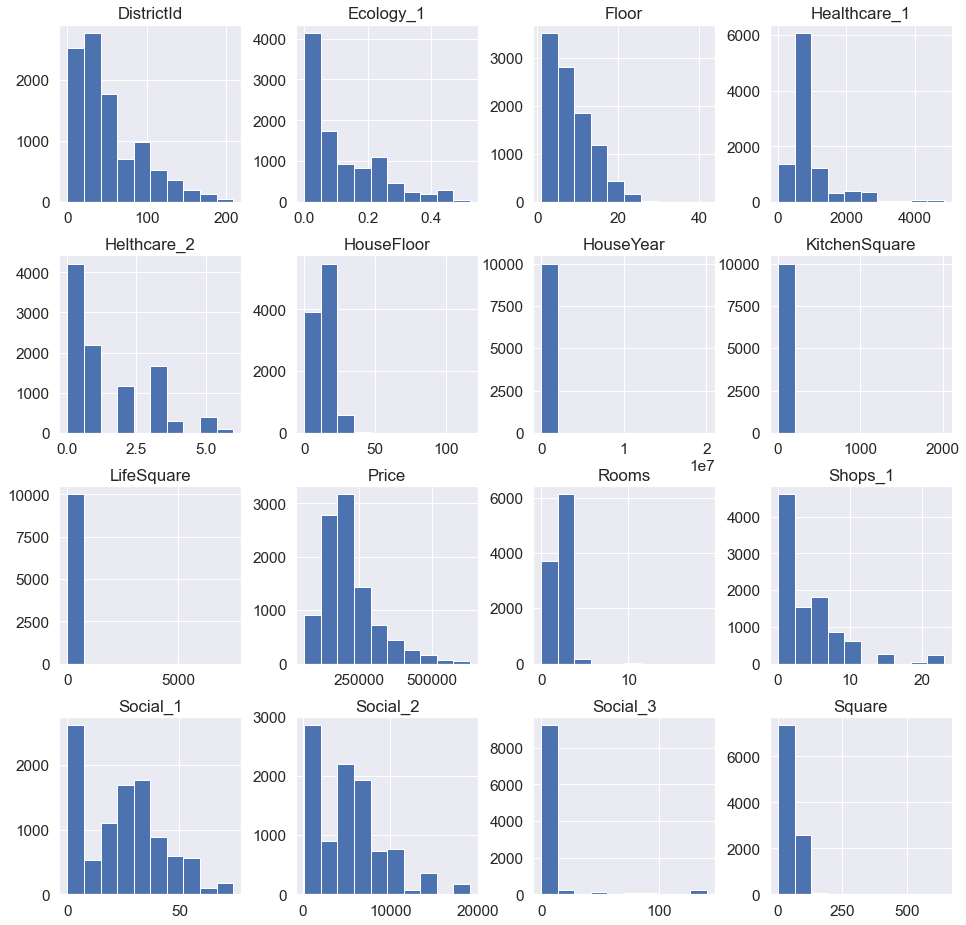

In [184]:
df_train[feat_numeric].hist(
    figsize = (16, 16)
)
plt.show()

In [185]:
df_train['HouseYear'].describe()

count    1.000000e+04
mean     3.990166e+03
std      2.005003e+05
min      1.910000e+03
25%      1.974000e+03
50%      1.977000e+03
75%      2.001000e+03
max      2.005201e+07
Name: HouseYear, dtype: float64

In [186]:
df_train[df_train['HouseYear']>2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


In [187]:
df_train.drop(
    index = df_train[df_train['HouseYear']>2020].index,
    axis = 0,
    inplace = True
)

In [188]:
df_train[df_train['HouseYear']>2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [189]:
df_train[df_train['LifeSquare']>1000]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,900.0,0,0,B,217357.492366


In [190]:
df_test[df_test['LifeSquare']>1000]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [191]:
df_test.drop(
    index = df_test[df_test['LifeSquare']>1000].index,
    axis = 0,
    inplace = True
)

In [192]:
df_test[df_test['LifeSquare']>1000]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [193]:
df_train[df_train['KitchenSquare']>df_train['Square']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1.0,47.100719,46.447960,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,900.0,0,0,A,108337.484207
5149,13703,42,1.0,38.071692,19.723548,73.0,9,10.0,2006,0.158249,B,B,21,5731,0,900.0,1,0,B,160488.033165
7088,6569,27,1.0,38.220258,18.716856,84.0,4,17.0,2018,0.011654,B,B,4,915,0,900.0,0,0,B,99079.960518
8584,14679,81,1.0,32.276663,19.278394,1970.0,6,1.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,105539.556275


In [194]:
_ = df_train[df_train['KitchenSquare']<=df_train['Square']][['Square', 'KitchenSquare']].median()
print(_)
square, kitchen = _[0], _[1]

Square           52.535436
KitchenSquare     6.000000
dtype: float64


In [195]:
kitchen/square

0.11420862713163207

In [196]:
df_train.loc[df_train['KitchenSquare']>df_train['Square'], 'KitchenSquare'] = \
df_train.loc[df_train['KitchenSquare']>df_train['Square'], 'Square'] * kitchen/square

In [197]:
df_train[df_train['KitchenSquare']>df_train['Square']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [198]:
df_test[df_test['KitchenSquare']>df_test['Square']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
1964,14594,11,2.0,42.795304,24.223770,620.0,11,14.0,1972,0.038693,B,B,28,6533,1,1015.0,2,5,B
2424,10662,29,1.0,25.956829,17.251768,33.0,5,5.0,1973,0.069660,B,B,31,6119,4,900.0,1,2,B
3863,3194,29,2.0,43.926987,31.028707,44.0,6,5.0,1964,0.086885,B,B,10,2277,2,1547.0,0,0,B
4555,12640,6,2.0,54.629142,31.486308,97.0,4,17.0,2015,0.243205,B,B,5,1564,0,540.0,0,0,B


In [199]:
_ = df_test[df_test['KitchenSquare']<=df_test['Square']][['Square', 'KitchenSquare']].median()
square, kitchen = _[0], _[1]

In [200]:
df_test.loc[df_test['KitchenSquare']>df_test['Square'], 'KitchenSquare'] = \
df_test.loc[df_test['KitchenSquare']>df_test['Square'], 'Square'] * kitchen/square

In [201]:
df_test[df_test['KitchenSquare']>df_test['Square']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [202]:
df_train[df_train['Rooms']>6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,900.0,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,900.0,0,1,B,78364.616704
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863


In [203]:
df_train.drop(
    index = df_train[df_train['Rooms']>6].index,
    axis = 0,
    inplace = True
)

In [204]:
df_train[df_train['Rooms']>6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price


In [205]:
df_test[df_test['Rooms']>6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
3398,1435,111,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,B,B,23,4635,5,3300.0,2,4,B


In [206]:
df_test.drop(
    index = df_test[df_test['Rooms']>6].index,
    axis = 0,
    inplace = True
)

In [207]:
df_test[df_test['Rooms']>6]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2


In [208]:
df_train[df_train['Floor']>df_train['HouseFloor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
7,11993,74,2.0,80.312926,32.781260,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,900.0,0,2,B,221244.156664
14,10953,27,1.0,53.769097,52.408027,1.0,5,4.0,1977,0.072158,B,B,2,629,1,900.0,0,0,A,140647.565937
16,2119,27,2.0,49.360648,31.993964,5.0,6,5.0,1983,0.051815,B,B,5,1227,0,900.0,0,0,B,117000.381287
21,11935,27,2.0,64.711835,32.781260,1.0,15,1.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B,127200.026511
23,6641,54,3.0,118.907612,32.781260,0.0,2,0.0,1977,0.006076,B,B,30,5285,0,645.0,6,6,B,571069.052600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9984,2237,52,3.0,64.074977,47.633428,6.0,11,9.0,1983,0.371149,B,B,34,7065,1,750.0,2,5,B,226434.880156
9985,16159,27,1.0,38.968338,32.781260,1.0,10,1.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B,95529.569405
9989,4145,96,3.0,90.055233,47.860231,11.0,26,24.0,2005,0.041116,B,B,53,14892,4,900.0,1,4,B,441108.911237
9991,11553,3,3.0,101.622794,51.628780,12.0,18,17.0,2000,0.265089,B,B,37,5288,0,1937.0,3,2,B,212883.501504


In [209]:
df_train['HouseFloor_outlier'] = 0
df_train.loc[df_train['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
df_train.loc[df_train['Floor'] > df_train['HouseFloor'], 'HouseFloor_outlier'] = 1
        
df_train.loc[df_train['HouseFloor'] == 0, 'HouseFloor'] = df_train['HouseFloor'].median()
df_train.loc[df_train['Floor'] > df_train['HouseFloor'], 'Floor'] = df_train.loc[df_train['Floor'] > df_train['HouseFloor'], 'HouseFloor']

In [210]:
df_train[df_train['Floor']>df_train['HouseFloor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,HouseFloor_outlier


In [211]:
df_test[df_test['Floor']>df_test['HouseFloor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
1,15856,74,2.0,69.263183,900.000000,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,900.0,0,2,B
10,15975,61,3.0,64.543658,42.651541,7.0,10,9.0,1981,0.300323,B,B,52,10311,6,900.0,1,9,B
14,5214,27,1.0,37.555197,900.000000,1.0,5,1.0,1977,0.211401,B,B,9,1892,0,900.0,0,1,B
22,12694,27,3.0,83.670032,46.358356,0.0,8,0.0,2015,0.072158,B,B,2,629,1,900.0,0,0,A
24,8968,27,2.0,69.849239,900.000000,0.0,3,0.0,1977,0.011654,B,B,4,915,0,900.0,0,0,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4976,4723,95,1.0,45.542940,900.000000,0.0,6,0.0,1977,0.000699,B,B,14,3369,24,4129.0,0,3,B
4989,2591,39,2.0,44.203592,30.191691,6.0,10,9.0,1972,0.428826,B,B,25,5011,8,730.0,0,2,B
4993,14562,113,2.0,46.627882,27.058739,5.0,6,5.0,1969,0.307467,B,A,30,5048,9,325.0,2,5,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,900.0,5,15,B


In [212]:
df_test['HouseFloor_outlier'] = 0
df_test.loc[df_test['HouseFloor'] == 0, 'HouseFloor_outlier'] = 1
df_test.loc[df_test['Floor'] > df_test['HouseFloor'], 'HouseFloor_outlier'] = 1
        
df_test.loc[df_test['HouseFloor'] == 0, 'HouseFloor'] = df_test['HouseFloor'].median()
df_test.loc[df_test['Floor'] > df_test['HouseFloor'], 'Floor'] = df_test.loc[df_test['Floor'] > df_test['HouseFloor'], 'HouseFloor']

In [213]:
df_test[df_test['Floor']>df_test['HouseFloor']]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,HouseFloor_outlier


In [214]:
df_train[df_train['Healthcare_1']<10]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,HouseFloor_outlier
7447,9944,23,3.0,78.062848,32.78126,1.0,14.0,17.0,2017,0.014334,...,B,2,528,0,0.0,0,0,B,431238.467011,0


In [215]:
df_train.drop(
    index = df_train[df_train['Healthcare_1']<10].index,
    axis = 0,
    inplace = True
)

In [216]:
df_train[df_train['Healthcare_1']<10]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price,HouseFloor_outlier


In [217]:
df_test[df_test['Healthcare_1']<10]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,HouseFloor_outlier
3208,6408,23,3.0,74.175279,45.365425,10.0,4.0,5.0,1995,0.014334,B,B,2,528,0,0.0,0,0,B,0


In [218]:
df_test.drop(
    index = df_test[df_test['Healthcare_1']<10].index,
    axis = 0,
    inplace = True
)

In [219]:
df_test[df_test['Healthcare_1']<10]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,HouseFloor_outlier


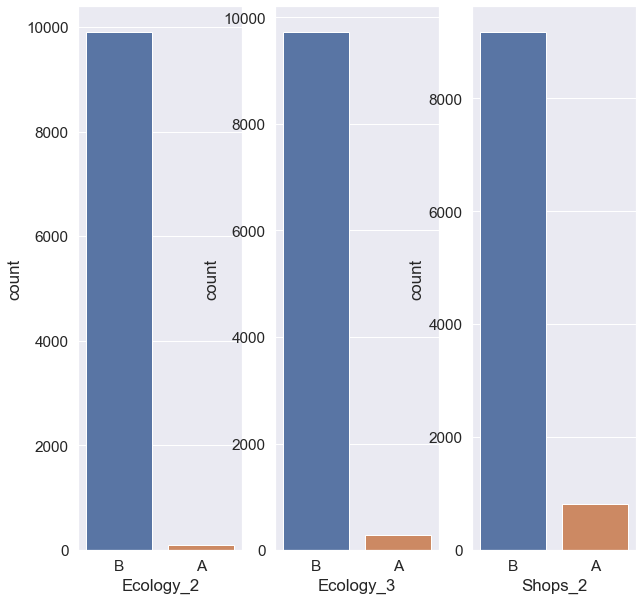

In [220]:
fig, ax = plt.subplots(
    nrows = 1,
    ncols = 3,
    figsize = (10, 10)
)
for n, f in enumerate(feat_object):
    sns.countplot(
    x=f,
    data=df_train,
    ax=ax[n]
    )
plt.show()

In [221]:
for col in feat_object:
    df_temp = pd.get_dummies(df_train[col])
    df_temp.columns = [col + '_' + c for c in df_temp]
    df_train.drop(
        labels = col,
        axis = 1,
        inplace = True
    )
    
    df_train = pd.concat(
        objs = (df_train, df_temp),
        axis = 1
    )
    del df_temp

In [222]:
df_train

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Price,HouseFloor_outlier,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,14038,35,2.0,47.981561,29.442751,6.0,7.0,9.0,1969,0.089040,...,0,11,184966.930730,0,0,1,0,1,0,1
1,15053,41,3.0,65.683640,40.049543,8.0,7.0,9.0,1978,0.000070,...,1,16,300009.450063,0,0,1,0,1,0,1
2,4765,53,2.0,44.947953,29.197612,0.0,8.0,12.0,1968,0.049637,...,1,3,220925.908524,0,0,1,0,1,0,1
3,5809,58,2.0,53.352981,52.731512,9.0,8.0,17.0,1977,0.437885,...,0,5,175616.227217,0,0,1,0,1,0,1
4,10783,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976,0.012339,...,2,4,150226.531644,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,77,32,2.0,50.401785,30.476203,5.0,5.0,5.0,1968,0.135650,...,3,11,196684.316040,1,0,1,0,1,0,1
9996,6159,18,1.0,41.521546,20.539216,9.0,13.0,13.0,2000,0.000000,...,0,5,189050.289571,0,0,1,0,1,1,0
9997,5123,27,1.0,47.939008,32.781260,1.0,12.0,16.0,2015,0.072158,...,0,0,159143.805370,0,0,1,0,1,1,0
9998,5400,75,2.0,43.602562,33.840147,8.0,1.0,5.0,1961,0.307467,...,2,5,181595.339808,0,0,1,1,0,0,1


In [223]:
for col in feat_object:
    df_temp = pd.get_dummies(df_test[col])
    df_temp.columns = [col + '_' + c for c in df_temp]
    df_test.drop(
        labels = col,
        axis = 1,
        inplace = True
    )
    
    df_test = pd.concat(
        objs = (df_test, df_temp),
        axis = 1
    )
    del df_temp

In [224]:
df_test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,HouseFloor_outlier,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,725,58,2.0,49.882643,33.432782,6.0,6.0,14.0,1972,0.310199,...,900.0,0,0,0,0,1,0,1,0,1
1,15856,74,2.0,69.263183,900.000000,1.0,1.0,1.0,1977,0.075779,...,900.0,0,2,1,0,1,0,1,0,1
2,5480,190,1.0,13.597819,15.948246,12.0,2.0,5.0,1909,0.000000,...,4702.0,5,5,0,0,1,0,1,0,1
3,15664,47,2.0,73.046609,51.940842,9.0,22.0,22.0,2007,0.101872,...,900.0,3,3,0,0,1,0,1,0,1
4,14275,27,1.0,47.527111,43.387569,1.0,17.0,17.0,2017,0.072158,...,900.0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5.0,9.0,1973,0.000170,...,900.0,1,1,0,0,1,0,1,0,1
4996,4695,1,1.0,40.198472,21.807061,10.0,12.0,17.0,2017,0.007122,...,900.0,0,1,0,0,1,0,1,0,1
4997,5783,12,3.0,77.842178,48.282625,9.0,22.0,22.0,1989,0.090799,...,900.0,5,15,1,0,1,0,1,0,1
4998,4780,62,2.0,81.305222,900.000000,0.0,4.0,12.0,1977,0.072158,...,900.0,0,0,1,0,1,0,1,1,0


In [225]:
feat = list(df_train.columns)
feat.pop(0)

'Id'

In [226]:
df_test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,HouseFloor_outlier,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,725,58,2.0,49.882643,33.432782,6.0,6.0,14.0,1972,0.310199,...,900.0,0,0,0,0,1,0,1,0,1
1,15856,74,2.0,69.263183,900.000000,1.0,1.0,1.0,1977,0.075779,...,900.0,0,2,1,0,1,0,1,0,1
2,5480,190,1.0,13.597819,15.948246,12.0,2.0,5.0,1909,0.000000,...,4702.0,5,5,0,0,1,0,1,0,1
3,15664,47,2.0,73.046609,51.940842,9.0,22.0,22.0,2007,0.101872,...,900.0,3,3,0,0,1,0,1,0,1
4,14275,27,1.0,47.527111,43.387569,1.0,17.0,17.0,2017,0.072158,...,900.0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5.0,9.0,1973,0.000170,...,900.0,1,1,0,0,1,0,1,0,1
4996,4695,1,1.0,40.198472,21.807061,10.0,12.0,17.0,2017,0.007122,...,900.0,0,1,0,0,1,0,1,0,1
4997,5783,12,3.0,77.842178,48.282625,9.0,22.0,22.0,1989,0.090799,...,900.0,5,15,1,0,1,0,1,0,1
4998,4780,62,2.0,81.305222,900.000000,0.0,4.0,12.0,1977,0.072158,...,900.0,0,0,1,0,1,0,1,1,0


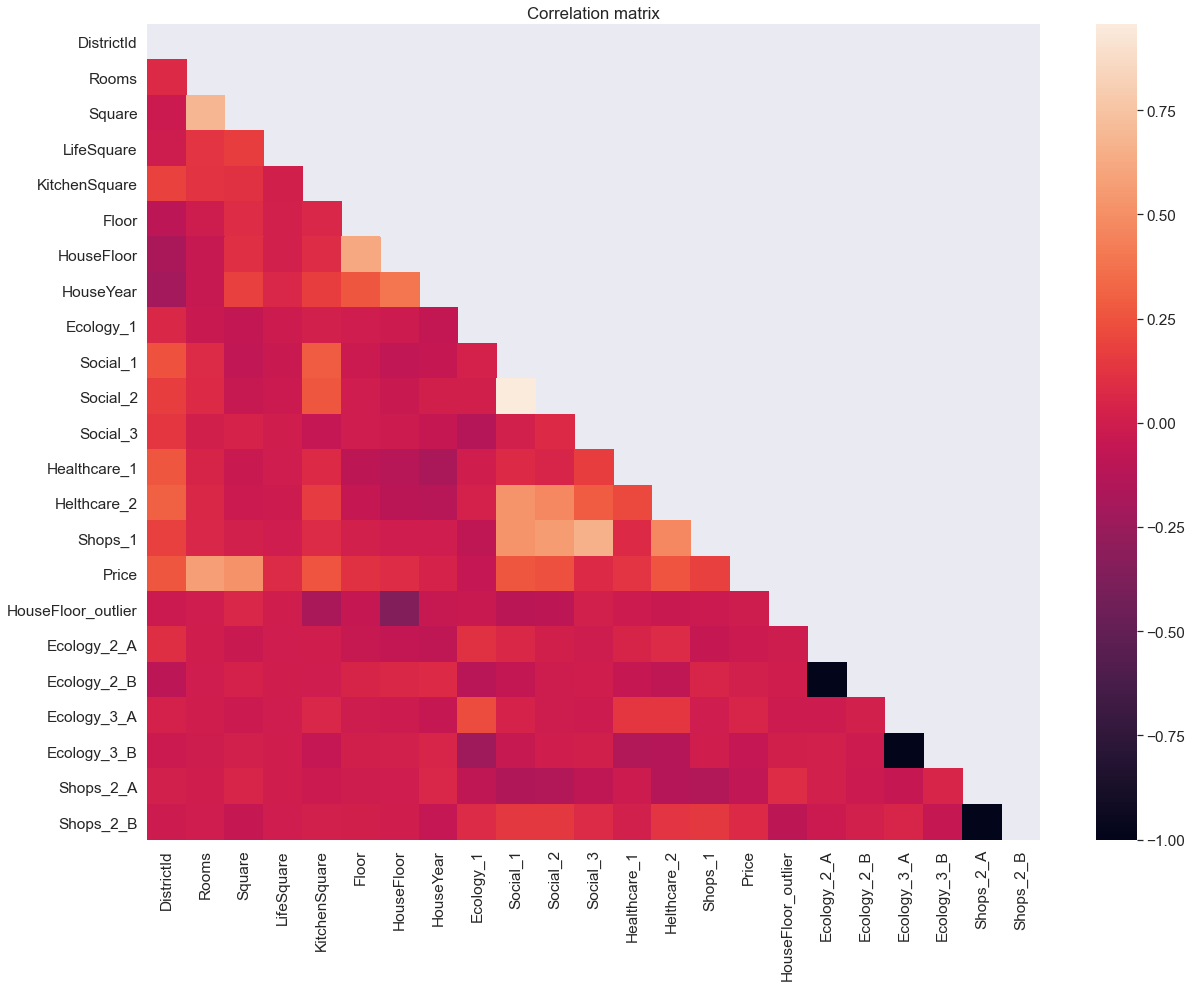

In [227]:
plt.figure(figsize=(20, 15))
corr = df_train[feat].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

sns.set(font_scale=1.4)
sns.heatmap(
    data=corr,
    mask=mask,
    annot=False
)

plt.title('Correlation matrix')
plt.show()

In [228]:
feat.pop(feat.index('Price'))

'Price'

In [229]:
df_test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,HouseFloor_outlier,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,725,58,2.0,49.882643,33.432782,6.0,6.0,14.0,1972,0.310199,...,900.0,0,0,0,0,1,0,1,0,1
1,15856,74,2.0,69.263183,900.000000,1.0,1.0,1.0,1977,0.075779,...,900.0,0,2,1,0,1,0,1,0,1
2,5480,190,1.0,13.597819,15.948246,12.0,2.0,5.0,1909,0.000000,...,4702.0,5,5,0,0,1,0,1,0,1
3,15664,47,2.0,73.046609,51.940842,9.0,22.0,22.0,2007,0.101872,...,900.0,3,3,0,0,1,0,1,0,1
4,14275,27,1.0,47.527111,43.387569,1.0,17.0,17.0,2017,0.072158,...,900.0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5.0,9.0,1973,0.000170,...,900.0,1,1,0,0,1,0,1,0,1
4996,4695,1,1.0,40.198472,21.807061,10.0,12.0,17.0,2017,0.007122,...,900.0,0,1,0,0,1,0,1,0,1
4997,5783,12,3.0,77.842178,48.282625,9.0,22.0,22.0,1989,0.090799,...,900.0,5,15,1,0,1,0,1,0,1
4998,4780,62,2.0,81.305222,900.000000,0.0,4.0,12.0,1977,0.072158,...,900.0,0,0,1,0,1,0,1,1,0


In [137]:
model = sklearn.ensemble.RandomForestRegressor(
    n_estimators=500,
    criterion='mse',
    max_depth=90,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=.75,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=True,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=.75,
)

In [138]:
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(
    df_train[feat],
    df_train[target],
    random_state = 0
)

In [139]:
model.fit(
    X=X_train,
    y=y_train
)

RandomForestRegressor(max_depth=90, max_features=0.75, max_samples=0.75,
                      n_estimators=500, n_jobs=-1, oob_score=True,
                      random_state=0)

In [140]:
y_pred_train = model.predict(
    X=X_valid
)

sklearn.metrics.r2_score(
    y_true=y_valid,
    y_pred=y_pred_train
)

0.7462972878430033

In [141]:
y_pred_test = model.predict(
    X=df_test[feat]
)

In [142]:
df_test

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,HouseFloor_outlier,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,Shops_2_A,Shops_2_B
0,725,58,2.0,49.882643,33.432782,6.0,6.0,14.0,1972,0.310199,...,900.0,0,0,0,0,1,0,1,0,1
1,15856,74,2.0,69.263183,900.000000,1.0,1.0,1.0,1977,0.075779,...,900.0,0,2,1,0,1,0,1,0,1
2,5480,190,1.0,13.597819,15.948246,12.0,2.0,5.0,1909,0.000000,...,4702.0,5,5,0,0,1,0,1,0,1
3,15664,47,2.0,73.046609,51.940842,9.0,22.0,22.0,2007,0.101872,...,900.0,3,3,0,0,1,0,1,0,1
4,14275,27,1.0,47.527111,43.387569,1.0,17.0,17.0,2017,0.072158,...,900.0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8180,11,3.0,67.133911,50.809797,6.0,5.0,9.0,1973,0.000170,...,900.0,1,1,0,0,1,0,1,0,1
4996,4695,1,1.0,40.198472,21.807061,10.0,12.0,17.0,2017,0.007122,...,900.0,0,1,0,0,1,0,1,0,1
4997,5783,12,3.0,77.842178,48.282625,9.0,22.0,22.0,1989,0.090799,...,900.0,5,15,1,0,1,0,1,0,1
4998,4780,62,2.0,81.305222,900.000000,0.0,4.0,12.0,1977,0.072158,...,900.0,0,0,1,0,1,0,1,1,0


In [143]:
df_test[target] = y_pred_test

In [144]:
df_test.shape

(5000, 24)

In [145]:
df_test[['Id', 'Price']].to_csv('submission.csv', index=None)

In [146]:
df_submission.shape

(5000, 2)

In [230]:
model = LGBMRegressor(
    n_estimators=200,
    criterion='mse',
    max_depth=30,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=.75,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=True,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=.75,
)

In [231]:
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(
    df_train[feat],
    df_train[target],
    random_state = 0
)

In [232]:
model.fit(
    X=X_train,
    y=y_train
)

LGBMRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=30,
              max_features=0.75, max_leaf_nodes=None, max_samples=0.75,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200, oob_score=True,
              random_state=0, verbose=0, warm_start=False)

In [233]:
y_pred_train = model.predict(
    X=X_valid
)

sklearn.metrics.r2_score(
    y_true=y_valid,
    y_pred=y_pred_train
)

0.746899189633865

In [234]:
y_pred_test = model.predict(
    X=df_test[feat]
)

In [235]:
df_test[target] = y_pred_test

In [236]:
df_test[['Id', 'Price']].to_csv('submission.csv', index=None)

In [237]:
df_submission.shape

(5000, 2)